## Data Preparation 

In [1]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the dataset
ardi_data = pd.read_csv('Alcohol-Related_Disease_Impact__ARDI__Application_-_Alcohol-Attributable_Deaths_20240217.csv')
ardi_data.head()

YearStart  YearEnd LocationAbbr   LocationDesc DataSource ConditionType  \
0       2015     2019           WV  West Virginia       ARDI       Chronic   
1       2015     2019           WV  West Virginia       ARDI         Total   
2       2015     2019           US  United States       ARDI         Acute   
3       2015     2019           US  United States       ARDI         Acute   
4       2015     2019           WV  West Virginia       ARDI         Acute   

                     Category        Cause_of_Death  \
0                       Total  Total for All Causes   
1                       Total  Total for All Causes   
2  Alcohol-Related Poisonings     Alcohol poisoning   
3  Alcohol-Related Poisonings     Alcohol poisoning   
4                       Total  Total for All Causes   

               Data_Value_Unit  Data_Value_Type  ... ConditionTypeID  \
0  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
1  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
2  Alcohol-attributable deaths  5 years average  ...           ACUTE   
3  Alcohol-attributable deaths  5 years average  ...           ACUTE   
4  Alcohol-attributable deaths  5 years average  ...          ANYALC   

   CategoryID Cause_of_DeathID EffectID ConsumptionID SexID AgeCategoryID  \
0         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
1         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
2        CAT6           ALCPOI  HARMEFF        EXCSVE  GENF          UN21   
3        CAT6           ALCPOI  HARMEFF        EXCSVE  GENM           OTH   
4         TOT           TOTALL  HARMEFF        ANYALC  GENM           OTH   

  AgeGroupID DataValueTypeID  DataValueUnitId  
0       Age0             AAD        5YEARSAVG  
1       Age0             AAD        5YEARSAVG  
2      Age21             AAD        5YEARSAVG  
3       Age0             AAD        5YEARSAVG  
4       Age0             AAD        5YEARSAVG  

[5 rows x 30 columns]

In [3]:
# checking the shape
ardi_data.shape

(62504, 30)

In [4]:
# checking for missing values
missing_values = ardi_data.isnull().sum()

missing_values

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
ConditionType                     0
Category                          0
Cause_of_Death                    0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      312
Data_Value_Alt                49323
Data_Value_Footnote_Symbol    52564
Data_Value_Footnote           52564
Effect                            0
ConsumptionPattern                0
Sex                               0
AgeCategory                       0
AgeGroup                          0
LocationID                        0
ConditionTypeID                   0
CategoryID                        0
Cause_of_DeathID                  0
EffectID                          0
ConsumptionID                     0
SexID                             0
AgeCategoryID                     0
AgeGroupID                  

In [5]:
# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0]

# Check for empty cells (NaN or None)
empty_cells = ardi_data[ardi_data['Data_Value_Alt'].isnull() | (ardi_data['Data_Value_Alt'] == '')]



In [6]:
# Check for negative values
negative_values = ardi_data[ardi_data['Data_Value_Alt'] < 0]

# Display rows with negative values
print("Rows with negative values:")
# print(negative_values)

# Drop rows with negative values
ardi_data = ardi_data[ardi_data['Data_Value_Alt'] >= 0]




Rows with negative values:


In [7]:
# cross checking shape
ardi_data.shape

(13147, 30)

In [8]:
# Drop rows with empty cells (NaN or None) in the 'Data_value' column the target variable
ardi_data = ardi_data.dropna(subset=['Data_Value_Alt'])

ardi_data.isnull().sum()

# ardi_data.to_csv("new_try.csv")

# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0].count()

# Display rows with zero values
print("Rows with zero values:")
print(zero_values)

ardi_data.shape

Rows with zero values:
YearStart                     329
YearEnd                       329
LocationAbbr                  329
LocationDesc                  329
DataSource                    329
ConditionType                 329
Category                      329
Cause_of_Death                329
Data_Value_Unit               329
Data_Value_Type               329
Data_Value                    329
Data_Value_Alt                329
Data_Value_Footnote_Symbol     73
Data_Value_Footnote            73
Effect                        329
ConsumptionPattern            329
Sex                           329
AgeCategory                   329
AgeGroup                      329
LocationID                    329
ConditionTypeID               329
CategoryID                    329
Cause_of_DeathID              329
EffectID                      329
ConsumptionID                 329
SexID                         329
AgeCategoryID                 329
AgeGroupID                    329
DataValueTypeID          

(13147, 30)

In [9]:
# Convert start year and end year to date as years alone
ardi_data['YearStart'] = pd.to_datetime(ardi_data['YearStart'], format='%Y').dt.year
ardi_data['YearEnd'] = pd.to_datetime(ardi_data['YearEnd'], format='%Y').dt.year

# Verify the changes
print(ardi_data.dtypes)


YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
ConditionType                  object
Category                       object
Cause_of_Death                 object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                     object
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Effect                         object
ConsumptionPattern             object
Sex                            object
AgeCategory                    object
AgeGroup                       object
LocationID                      int64
ConditionTypeID                object
CategoryID                     object
Cause_of_DeathID               object
EffectID                       object
ConsumptionID                  object
SexID                          object
AgeCategoryI

In [10]:
# removing aggreagation in the data

remaining_data = ardi_data[~(ardi_data.applymap(lambda x: 'Total' in str(x)).any(axis=1) | (ardi_data['LocationAbbr'] == 'US'))]
remaining_data = remaining_data[remaining_data['AgeGroup'] != 'Under 21']
# Remove rows with "Overall" in the Sex and AgeGroup columns
remaining_data = remaining_data[(remaining_data['AgeGroup'] != 'Overall')]



remaining_data.to_csv("Not_Total_data.csv",index=False)

In [11]:
# dropping the added encoding the data 
ardi_data_c = remaining_data.copy()
ardi_data_c = ardi_data_c[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType',
         'Category', 'Cause_of_Death', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
         'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Effect',
         'ConsumptionPattern', 'Sex', 'AgeGroup']]

# Drop specified columns
ardi_data_c.drop(['Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], axis=1, inplace=True)

ardi_data_c 


YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
1246        2015     2019           AL      Alabama       ARDI         Acute   
1249        2015     2019           AL      Alabama       ARDI         Acute   
1251        2015     2019           AL      Alabama       ARDI         Acute   
1254        2015     2019           AL      Alabama       ARDI         Acute   
1255        2015     2019           AL      Alabama       ARDI         Acute   
...          ...      ...          ...          ...        ...           ...   
62101       2015     2019           WY      Wyoming       ARDI       Chronic   
62153       2015     2019           WY      Wyoming       ARDI       Chronic   
62154       2015     2019           WY      Wyoming       ARDI       Chronic   
62156       2015     2019           WY      Wyoming       ARDI       Chronic   
62309       2015     2019           WY      Wyoming       ARDI       Chronic   

                            Category                 Cause_of_Death  \
1246      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1249      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1251      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1254   Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1255   Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
...                              ...                            ...   
62101      100% Alcohol-Attributable                  Alcohol abuse   
62153      100% Alcohol-Attributable        Alcoholic liver disease   
62154      100% Alcohol-Attributable        Alcoholic liver disease   
62156      100% Alcohol-Attributable        Alcoholic liver disease   
62309       Heart Disease and Stroke                   Hypertension   

       Data_Value_Alt           Effect     ConsumptionPattern      Sex  \
1246             10.0  Harmful Effects  Excessive Alcohol Use  Overall   
1249             54.0  Harmful Effects  Excessive Alcohol Use  Overall   
1251             82.0  Harmful Effects  Excessive Alcohol Use  Overall   
1254            115.0  Harmful Effects  Excessive Alcohol Use  Overall   
1255             23.0  Harmful Effects  Excessive Alcohol Use  Overall   
...               ...              ...                    ...      ...   
62101            12.0  Harmful Effects        Any Alcohol Use  Overall   
62153            14.0  Harmful Effects        Any Alcohol Use  Overall   
62154            24.0  Harmful Effects        Any Alcohol Use  Overall   
62156            43.0  Harmful Effects        Any Alcohol Use  Overall   
62309            11.0  Harmful Effects        Any Alcohol Use  Overall   

      AgeGroup  
1246       65+  
1249     50-64  
1251     35-49  
1254     20-34  
1255      0-19  
...        ...  
62101    50-64  
62153      65+  
62154    35-49  
62156    50-64  
62309      65+  

[4127 rows x 13 columns]

In [12]:
# checking unique values
unique_cat = ardi_data_c['AgeGroup'].unique()
print(unique_cat)

['65+' '50-64' '35-49' '20-34' '0-19']


In [13]:
# saving cleaned data
ardi_data_c.to_csv("Cleaned_1_data.csv",index=False)

In [14]:
# chexking the cleaned data info
ardi_data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 1246 to 62309
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearStart           4127 non-null   int64  
 1   YearEnd             4127 non-null   int64  
 2   LocationAbbr        4127 non-null   object 
 3   LocationDesc        4127 non-null   object 
 4   DataSource          4127 non-null   object 
 5   ConditionType       4127 non-null   object 
 6   Category            4127 non-null   object 
 7   Cause_of_Death      4127 non-null   object 
 8   Data_Value_Alt      4127 non-null   float64
 9   Effect              4127 non-null   object 
 10  ConsumptionPattern  4127 non-null   object 
 11  Sex                 4127 non-null   object 
 12  AgeGroup            4127 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 451.4+ KB


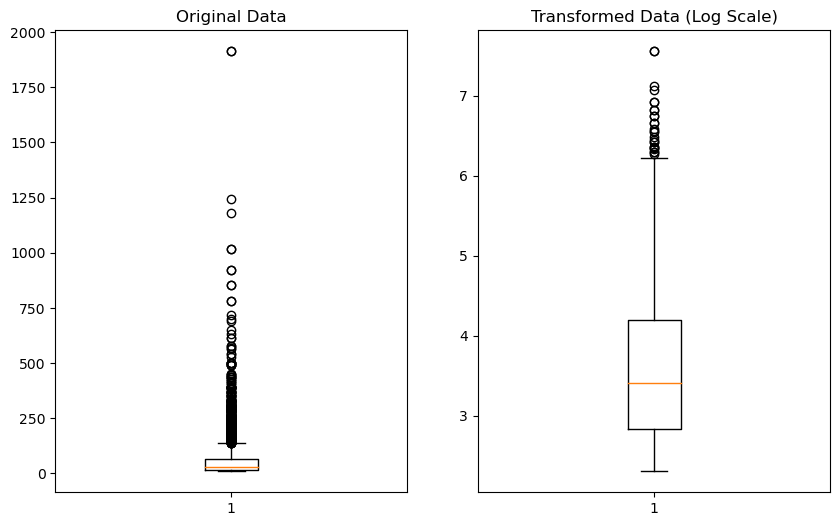

In [15]:
# comparison of transformed and untransformed data
"""Log transformation compresses larger values more than smaller ones, making the distribution more symmetric. 
It's commonly used in health data analysis for variables like income or biomarker measurements."""

data = ardi_data_c['Data_Value_Alt']

# Apply log transformation
transformed_data = np.log(ardi_data_c['Data_Value_Alt'])

# Plot boxplots for original and transformed data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(transformed_data)
plt.title('Transformed Data (Log Scale)')

plt.show()


## DATA EXPLORATION and Visualization

In [16]:
# data describe with encoding
ardi_data_c['Data_Value_Alt'].describe()

count    4127.000000
mean       60.507875
std        96.468573
min        10.000000
25%        17.000000
50%        30.000000
75%        66.000000
max      1913.000000
Name: Data_Value_Alt, dtype: float64

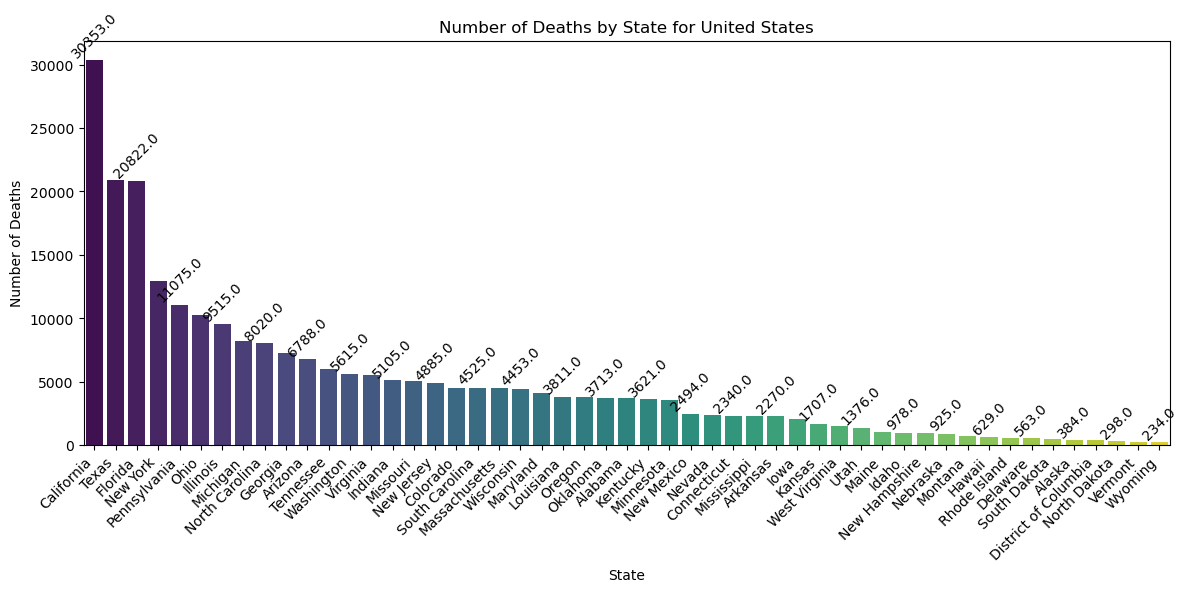

In [17]:
# Distribution of deaths by states

# Group data by state and sum the number of deaths
deaths_by_state = ardi_data_c.groupby('LocationDesc')['Data_Value_Alt'].sum().reset_index()

# Sorting the data by the number of deaths
deaths_by_state = deaths_by_state.sort_values(by='Data_Value_Alt', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='LocationDesc', y='Data_Value_Alt', data=deaths_by_state, palette='viridis')
plt.title('Number of Deaths by State for United States')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotation in interval of 2 bins
for i in range(0, len(deaths_by_state), 2):
    plt.text(i, deaths_by_state.iloc[i]['Data_Value_Alt'] + 10, str(deaths_by_state.iloc[i]['Data_Value_Alt']), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()




## Univariate

count    4127.000000
mean       60.507875
std        96.468573
min        10.000000
25%        17.000000
50%        30.000000
75%        66.000000
max      1913.000000
Name: Data_Value_Alt, dtype: float64


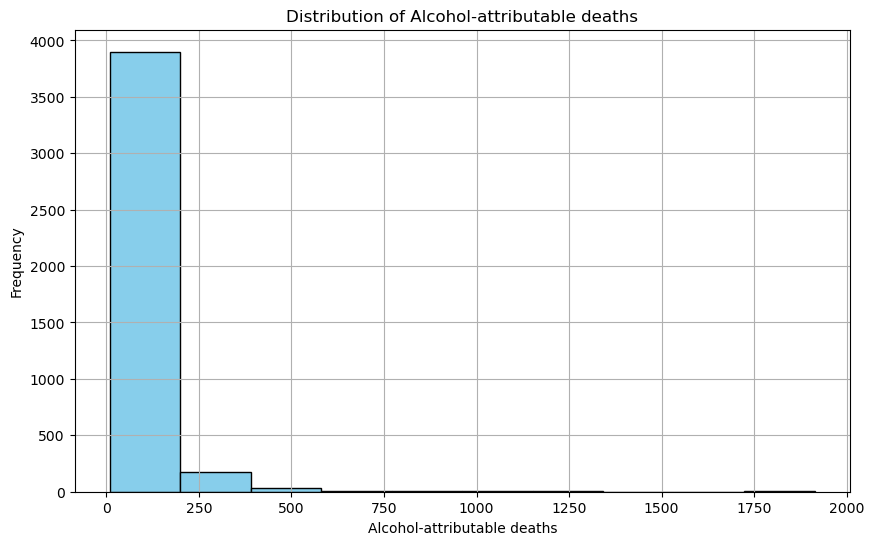

In [18]:
# Summary statistics
summary_stats = ardi_data_c["Data_Value_Alt"].describe()
print(summary_stats)

# Distribution analysis
plt.figure(figsize=(10, 6))
plt.hist(ardi_data_c["Data_Value_Alt"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Alcohol-attributable deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol-attributable deaths')
plt.grid(True)
plt.show()


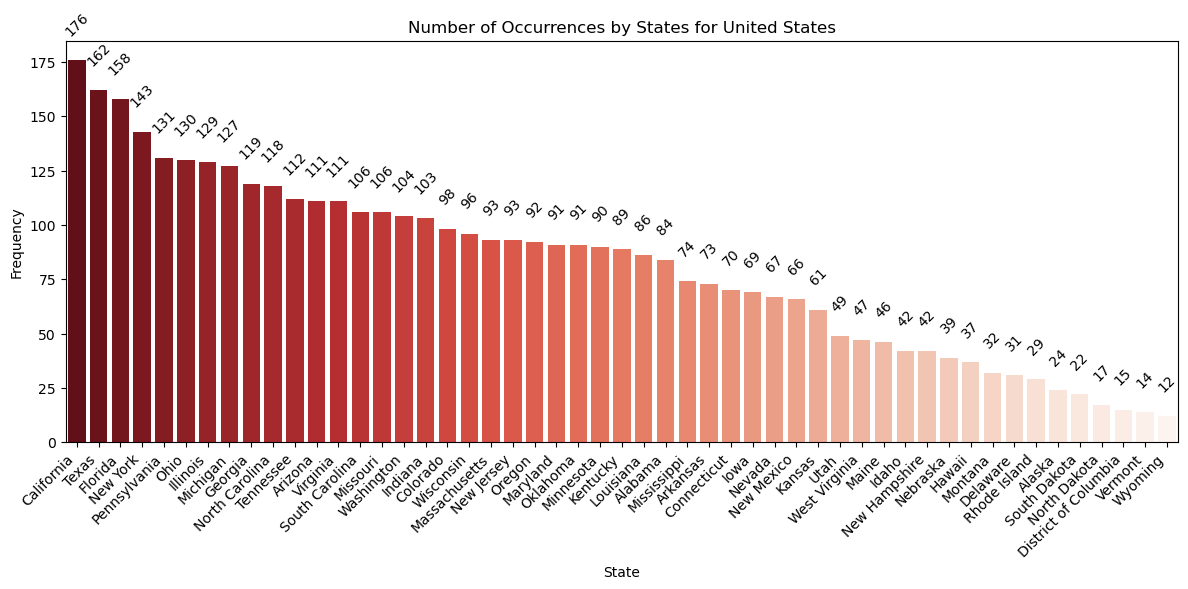

In [19]:
# Distribution of deaths by states

# Calculate the value counts of deaths by state
deaths_by_state = ardi_data_c['LocationDesc'].value_counts().reset_index()
deaths_by_state.columns = ['LocationDesc', 'Value_Count']

# Sorting the data by the value counts of deaths
deaths_by_state = deaths_by_state.sort_values(by='Value_Count', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='LocationDesc', y='Value_Count', data=deaths_by_state, palette='Reds_r')
plt.title('Number of Occurrences by States for United States') 
plt.xlabel('State') 
plt.ylabel('Frequency')  
plt.xticks(rotation=45, ha='right') 

# Add annotation for each bar
for i in range(len(deaths_by_state)):
    plt.text(i, deaths_by_state.iloc[i]['Value_Count'] + 10, str(deaths_by_state.iloc[i]['Value_Count']), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()


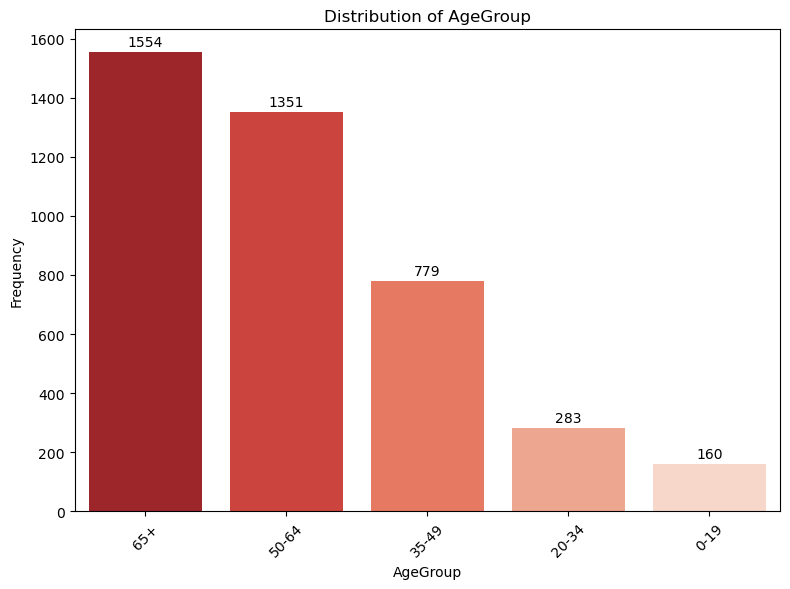

In [20]:
# Calculate frequency count of 'AgeGroup'
age_counts = ardi_data_c['AgeGroup'].value_counts()

# Define a custom color palette with a gradient from dark red to light red based on frequency
custom_palette = sns.color_palette("Reds_r", len(age_counts))

# Plot the bar chart with custom color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=custom_palette)

# Add annotation
for i, count in enumerate(age_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


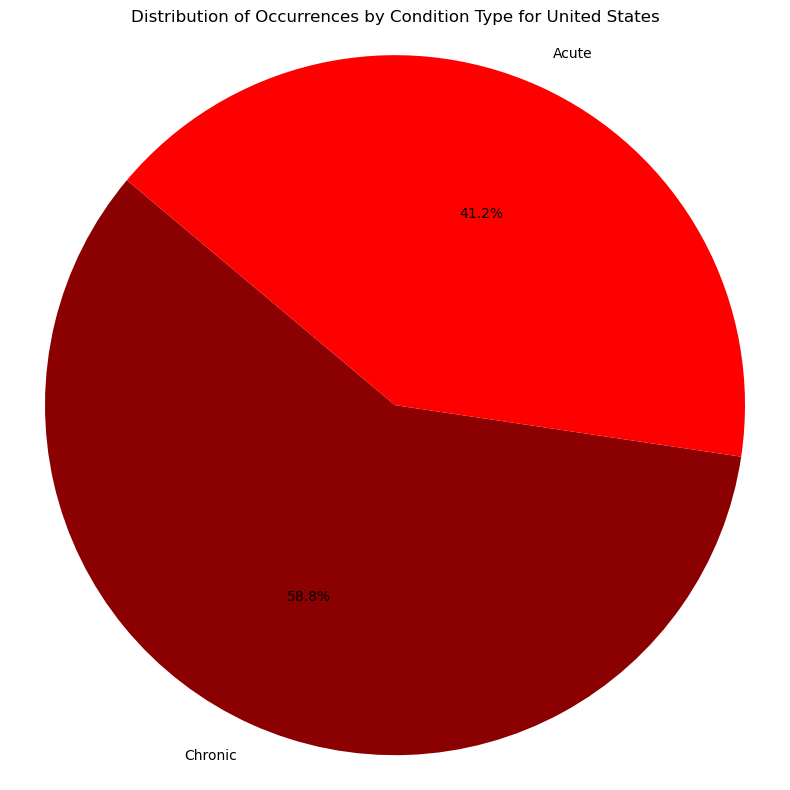

In [21]:
# Frequency of each condition type
condition_counts = ardi_data_c['ConditionType'].value_counts()

plt.figure(figsize=(8, 8))

# Define the custom color palette with red
colors = ['darkred','red']

# Plotting the pie chart with red color
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Occurrences by Condition Type for United States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


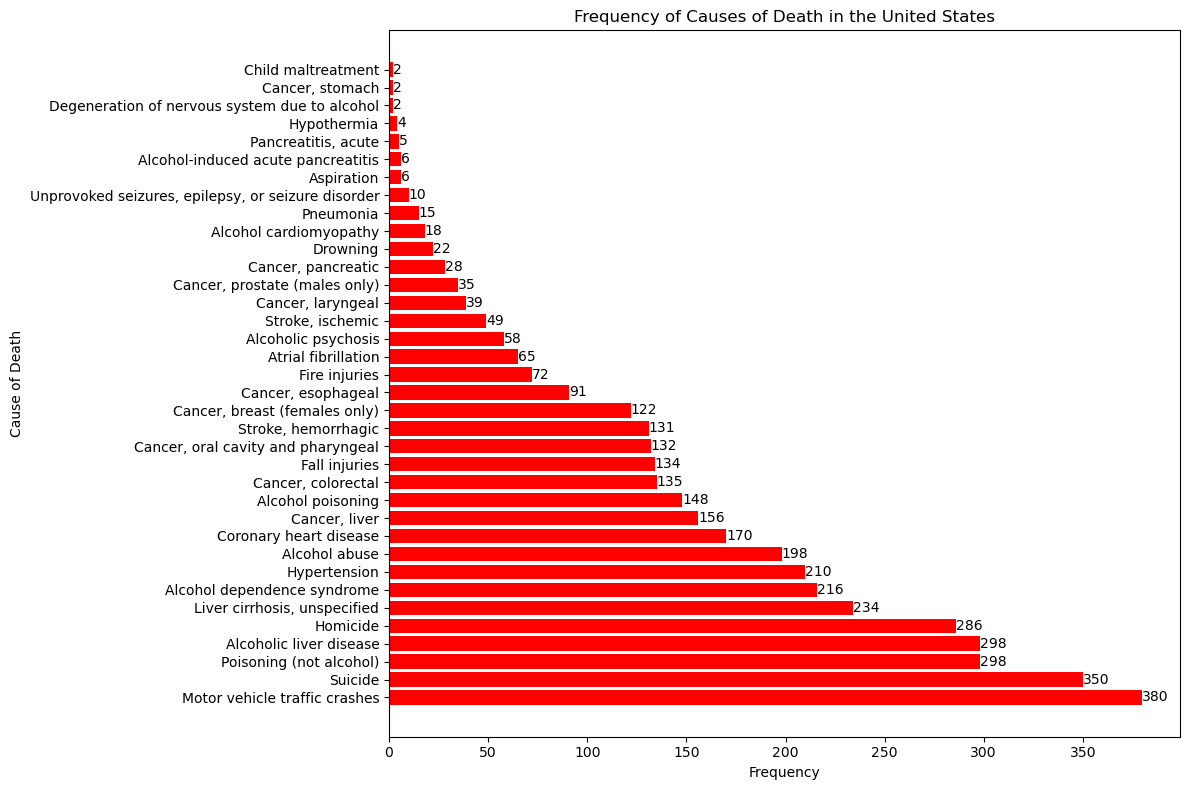

In [22]:
# Frequencey of each cause of death
cause_counts = ardi_data_c['Cause_of_Death'].value_counts()

plt.figure(figsize=(12, 8))

# Plotting the horizontal bar plot
bars = plt.barh(cause_counts.index, cause_counts.values, color='red')

plt.title('Frequency of Causes of Death in the United States')
plt.xlabel('Frequency')
plt.ylabel('Cause of Death')

# Adding annotations to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Bivariate

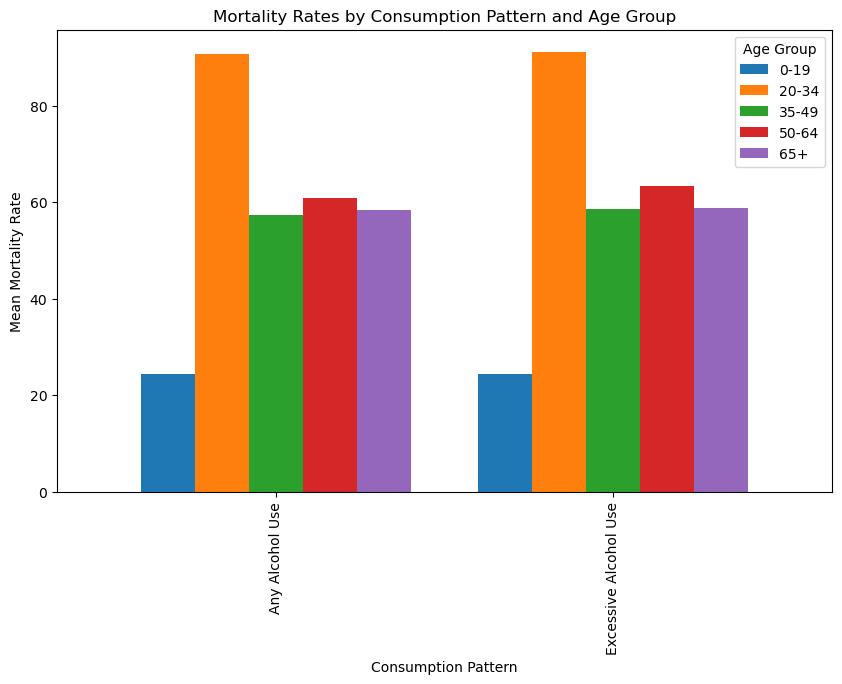

In [23]:

# Group the data by 'ConsumptionPattern' and 'AgeGroup' and calculate the mean mortality rates for each group
consumption_age_group = ardi_data_c.groupby(['ConsumptionPattern', 'AgeGroup'])['Data_Value_Alt'].mean().unstack()

# Plotting the grouped bar chart
consumption_age_group.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel('Consumption Pattern')
plt.ylabel('Mean Mortality Rate')
plt.title('Mortality Rates by Consumption Pattern and Age Group')

# Add legend
plt.legend(title='Age Group')

# Show plot
plt.show()


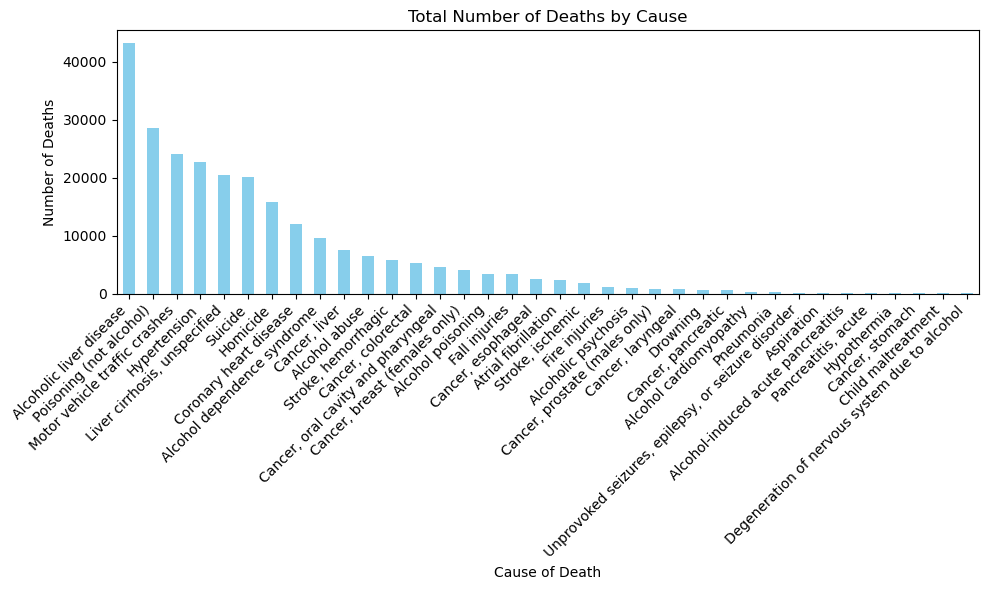

In [24]:
# plotting the death by cause
# Aggregate the data to calculate the total number of deaths for each cause
cause_of_death_totals = ardi_data_c.groupby('Cause_of_Death')['Data_Value_Alt'].sum()

# Sort the causes of death by the total number of deaths
cause_of_death_totals = cause_of_death_totals.sort_values(ascending=False)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
cause_of_death_totals.plot(kind='bar', stacked=True, color='skyblue')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Total Number of Deaths by Cause')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


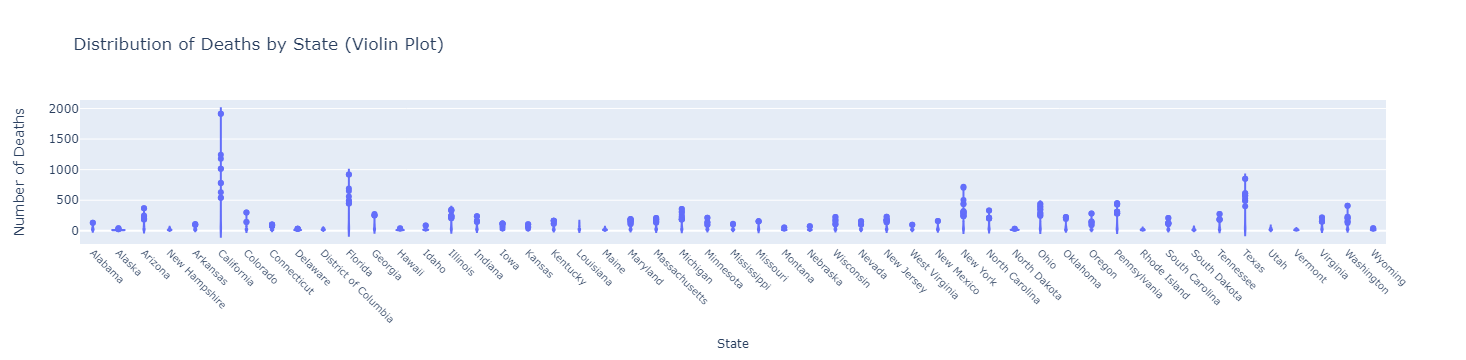

In [25]:
# using plotly for violin chart
import plotly.express as px

# Create the violin plot
fig = px.violin(ardi_data_c, x='LocationDesc', y='Data_Value_Alt', title='Distribution of Deaths by State (Violin Plot)', 
                labels={'LocationDesc': 'State', 'Data_Value_Alt': 'Number of Deaths'}, 
                color_discrete_sequence=['#636EFA'])

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45, tickfont=dict(size=10), title_font=dict(size=12))

# Show the plot
fig.show()


## Multivariate

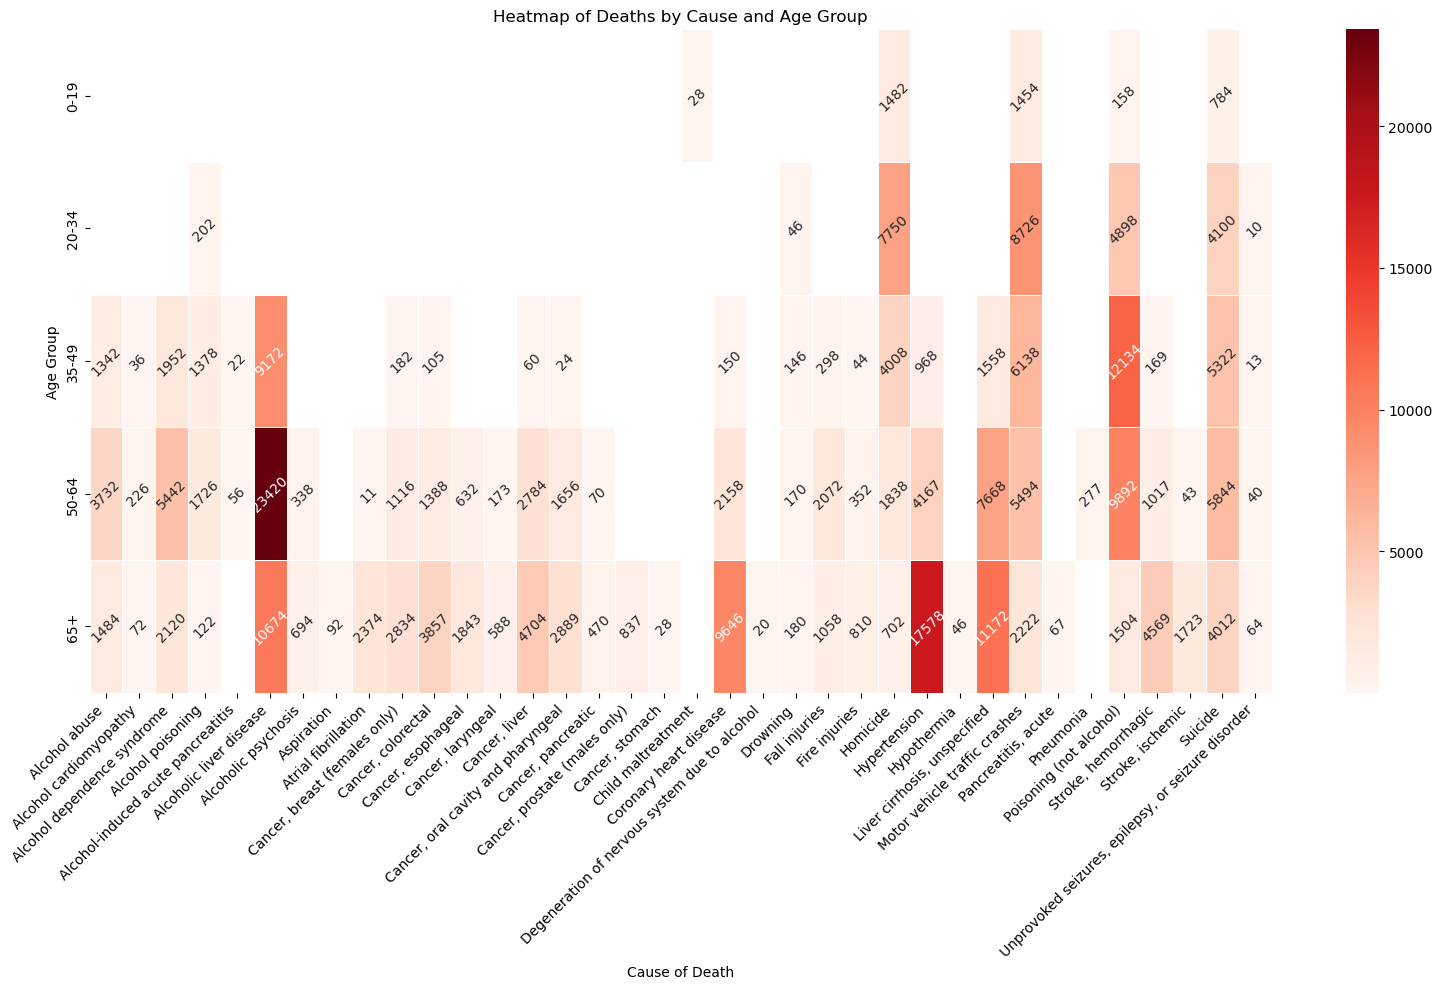

In [26]:
# Heatmap for number of death by cause of deatha and age group
# Grouping and summing data for deaths by cause and age group
deaths_heatmap_data = ardi_data_c.groupby(['Cause_of_Death', 'AgeGroup'])['Data_Value_Alt'].sum().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_matrix = deaths_heatmap_data.pivot(index='AgeGroup', columns='Cause_of_Death', values='Data_Value_Alt')

# Create the heatmap with larger figure size
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(heatmap_matrix, cmap='Reds', annot=True, fmt='g', linewidths=0.5)

# Customize labels and title
plt.title('Heatmap of Deaths by Cause and Age Group')
plt.xlabel('Cause of Death')
plt.ylabel('Age Group')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate annotations 
for _, text in enumerate(heatmap.texts):
    text.set_rotation(45)

plt.tight_layout() 

plt.show()


## Feature selection

Cause_of_Death: 0.3241
LocationDesc: 0.2018
LocationAbbr: 0.1999
AgeGroup: 0.1685
Category: 0.0619
ConditionType: 0.0220
ConsumptionPattern: 0.0218
YearStart: 0.0000
YearEnd: 0.0000
DataSource: 0.0000
Effect: 0.0000
Sex: 0.0000


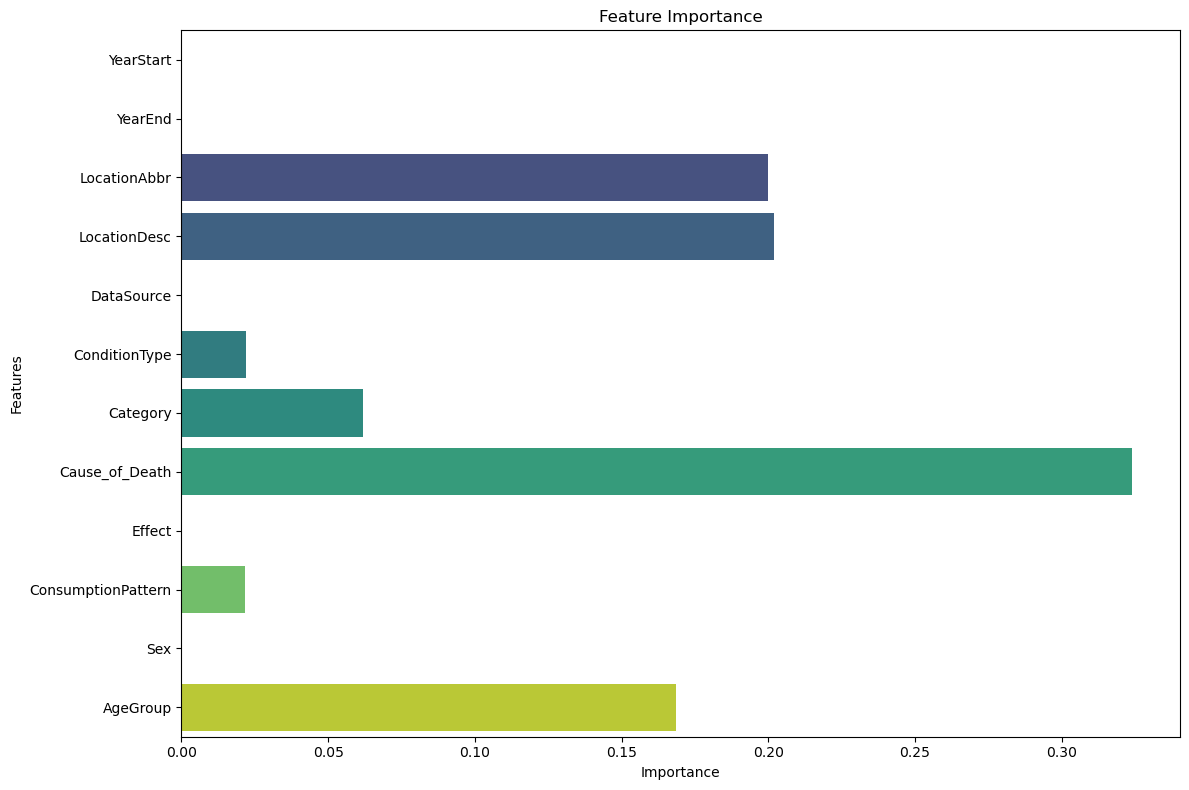

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'ardi_data_c' is a predefined DataFrame with appropriate columns

# Now proceed with encoding the categorical columns
categorical_columns = ['LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType', 'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup']

label_encoders = {}  # To store the label encoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col].astype(str))
    label_encoders[col] = le

# Assuming 'Data_Value_Alt' is the target variable and already numeric
X = ardi_data_c.drop(['Data_Value_Alt'], axis=1)  # Exclude target variable
y = ardi_data_c['Data_Value_Alt']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Print each feature with its corresponding importance
feature_importance_dict = dict(zip(features, importances))
for feature, importance in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [28]:
ardi_data_c.to_csv("encoded_data.csv")

In [29]:
# data describe after encoding
ardi_data_c.describe()

YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  \
count     4127.0   4127.0   4127.000000   4127.000000      4127.0   
mean      2015.0   2019.0     24.574752     24.574994         0.0   
std          0.0      0.0     14.436874     14.514343         0.0   
min       2015.0   2019.0      0.000000      0.000000         0.0   
25%       2015.0   2019.0     12.000000     12.000000         0.0   
50%       2015.0   2019.0     24.000000     24.000000         0.0   
75%       2015.0   2019.0     37.000000     37.000000         0.0   
max       2015.0   2019.0     50.000000     50.000000         0.0   

       ConditionType     Category  Cause_of_Death  Data_Value_Alt  Effect  \
count    4127.000000  4127.000000     4127.000000     4127.000000  4127.0   
mean        0.587594     3.098619       18.794524       60.507875     0.0   
std         0.492327     2.475809       11.201302       96.468573     0.0   
min         0.000000     0.000000        0.000000       10.000000     0.0   
25%         0.000000     1.000000        9.000000       17.000000     0.0   
50%         1.000000     3.000000       22.000000       30.000000     0.0   
75%         1.000000     5.000000       28.000000       66.000000     0.0   
max         1.000000     8.000000       35.000000     1913.000000     0.0   

       ConsumptionPattern     Sex     AgeGroup  
count         4127.000000  4127.0  4127.000000  
mean             0.482917     0.0     2.934335  
std              0.499769     0.0     1.088343  
min              0.000000     0.0     0.000000  
25%              0.000000     0.0     2.000000  
50%              0.000000     0.0     3.000000  
75%              1.000000     0.0     4.000000  
max              1.000000     0.0     4.000000

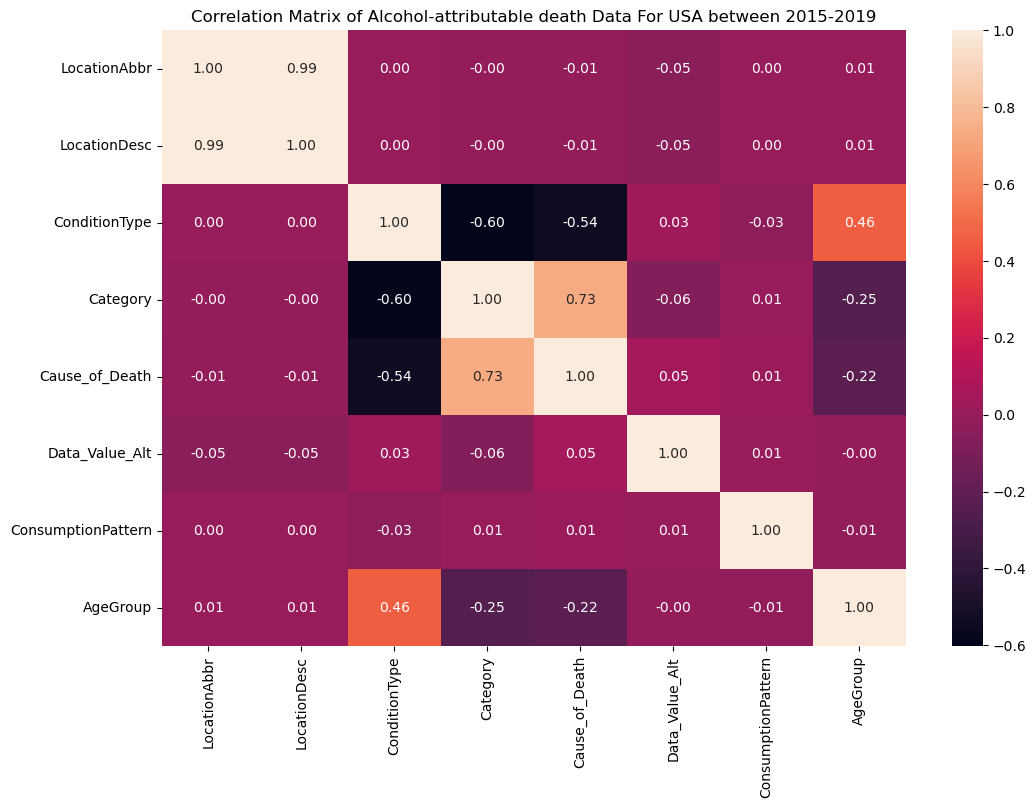

In [30]:
# correlation heatmap
# Exclude 'Datasource' and 'Effect' columns
ardi_data_c_numeric = ardi_data_c.drop(columns=['DataSource', 'Effect', 'Sex', 'YearStart', 'YearEnd'])

# Calculate correlation matrix
corr_matrix = ardi_data_c_numeric.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Alcohol-attributable death Data For USA between 2015-2019')  
plt.show()


In [31]:
# Random forest and GradientBoostingRegressor without using any factors
# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType','AgeGroup','Category','Cause_of_Death']]
y = ardi_data_c['Data_Value_Alt']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Evaluate Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print results
print("Random Forest Results:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("\nGradient Boosting Results:")
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


Random Forest Results:
Mean Squared Error (MSE): 1556.281625885855
Mean Absolute Error (MAE): 19.100223985356855
R-squared (R2): 0.8086830066550288

Gradient Boosting Results:
Mean Squared Error (MSE): 5383.169744992795
Mean Absolute Error (MAE): 37.5120402545764
R-squared (R2): 0.33823555251999493


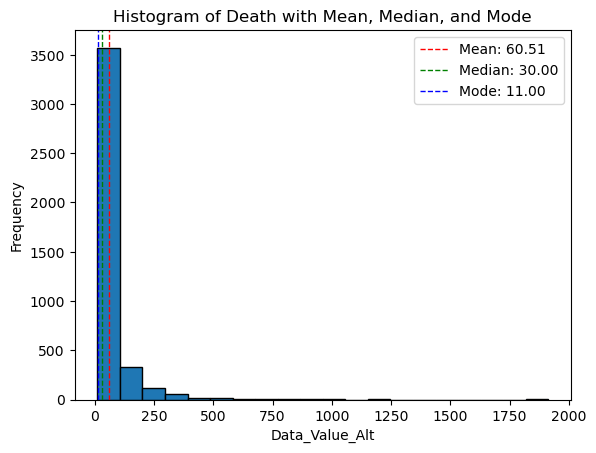

In [32]:
# Histogram and mean, median,mode
bin_count = min(int(np.sqrt(len(ardi_data_c['Data_Value_Alt']))), 20)  

# Visual Inspection: Histogram
plt.hist(ardi_data_c['Data_Value_Alt'], bins=bin_count, edgecolor='k')

# Calculate mean, median, and mode
mean_val = np.mean(ardi_data_c['Data_Value_Alt'])
median_val = np.median(ardi_data_c['Data_Value_Alt'])
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0] 

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Histogram of Death with Mean, Median, and Mode')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show plot
plt.show()


## Predictions

## Prediction based on Location

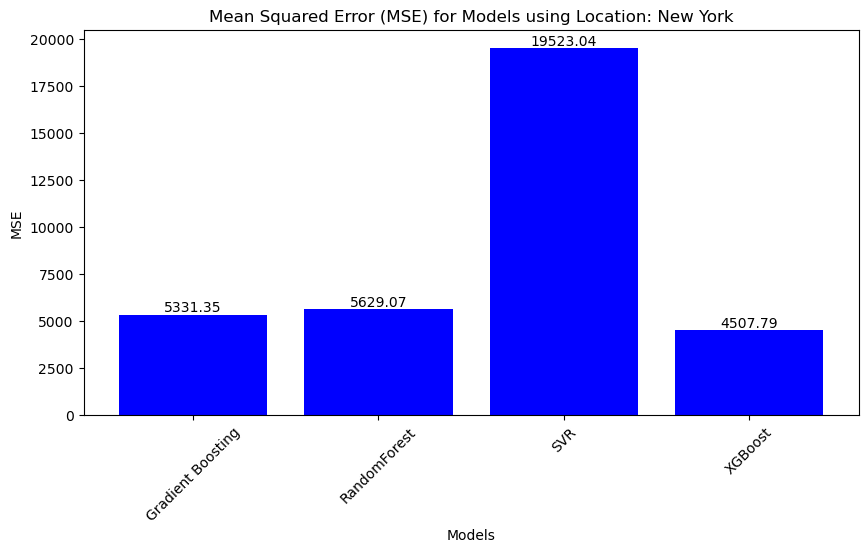

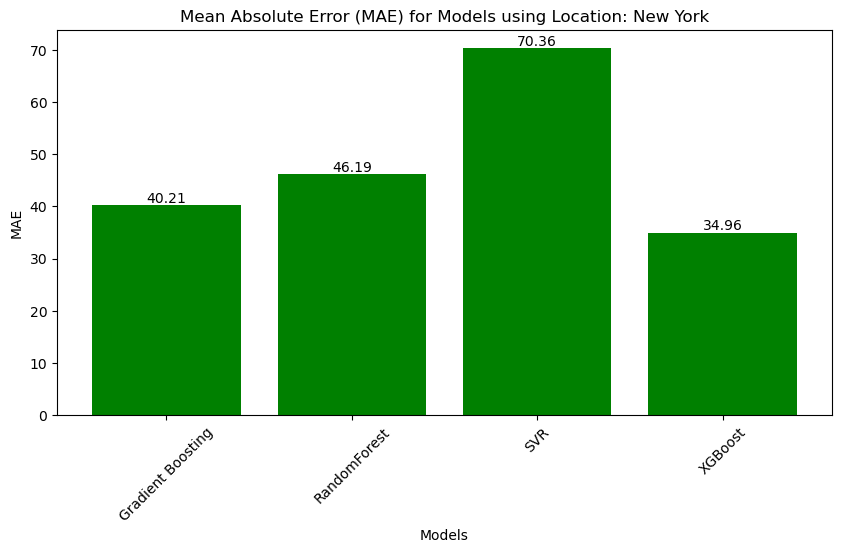

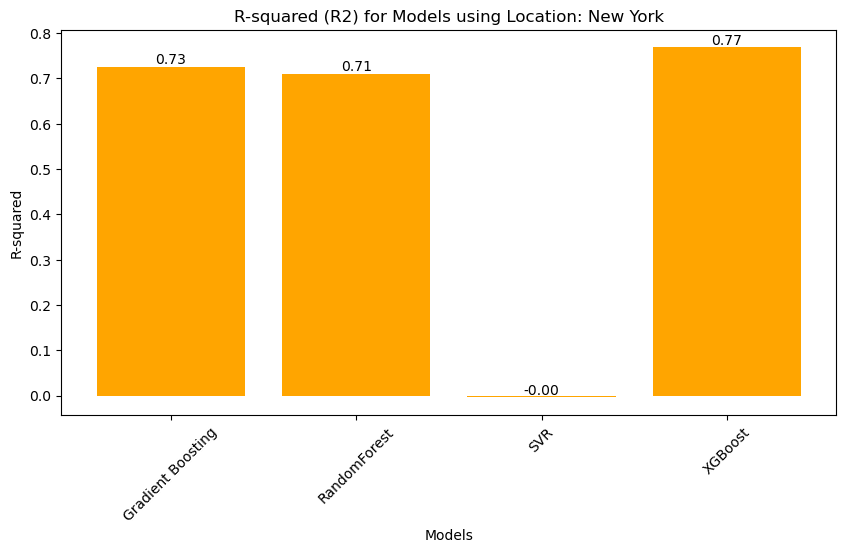

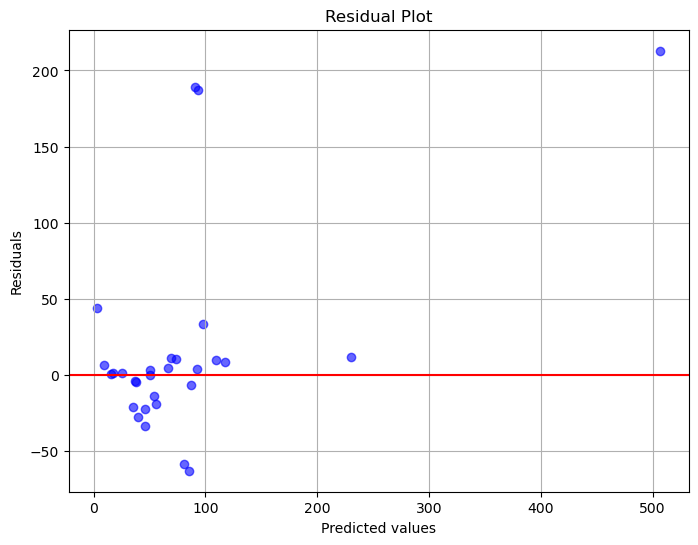

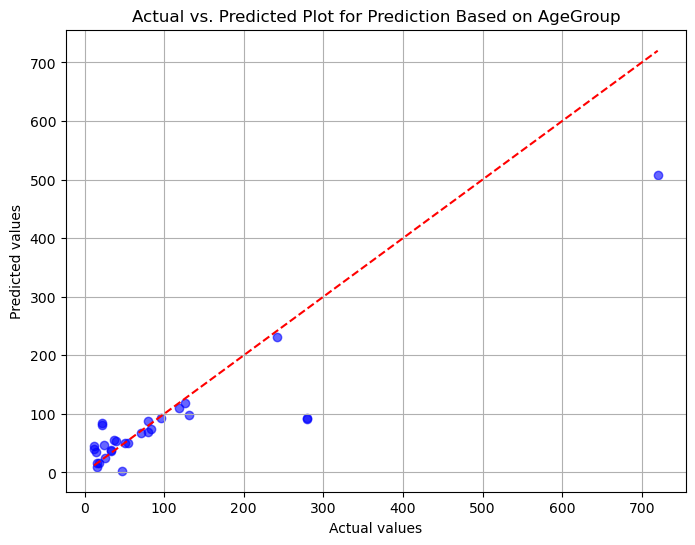

In [33]:
# based on location
def predict_with_models_location(ardi_data, location):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by location
    filtered_data = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Split data into features and target
    X = filtered_data[['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()
    
    return X_test, y_test, y_pred, mse_results, mae_results, r2_results, models

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, c='blue', marker='o', alpha=0.6)
    plt.title('Residual Plot')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid()
    plt.show()

def actual_vs_predicted_plot(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.6)
    plt.title('Actual vs. Predicted Plot for Prediction Based on Location')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.grid()
    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the location for filtering
location = 'New York'

# Perform prediction with models for the specified location
X_test, y_test, y_pred, mse_results, mae_results, r2_results, models = predict_with_models_location(ardi_data, location)

# Plot Residual Plot
residual_plot(y_test, y_pred)

# actual vs predicted
actual_vs_predicted_plot(y_test, y_pred)


## Prediction based on Cause of Death

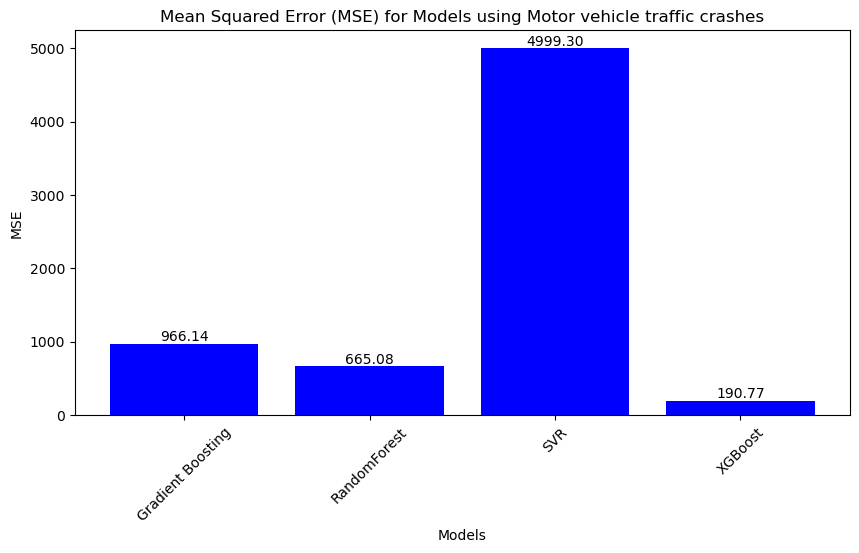

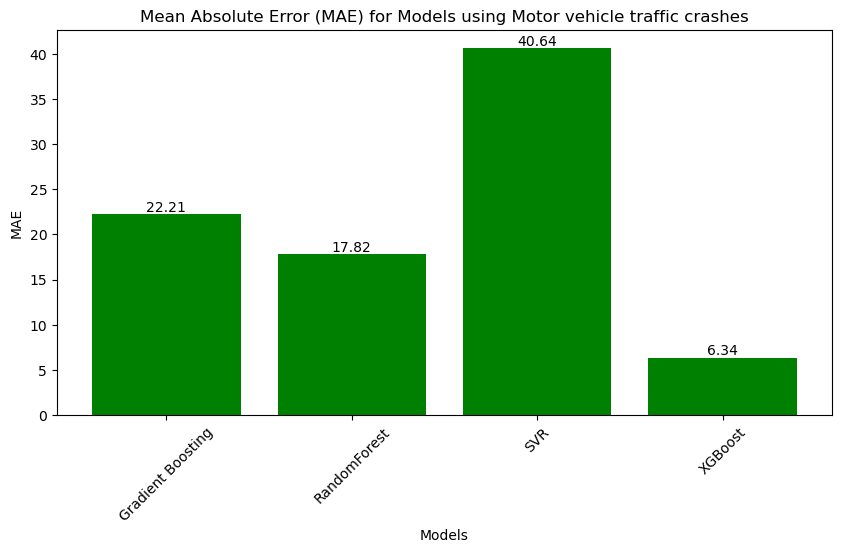

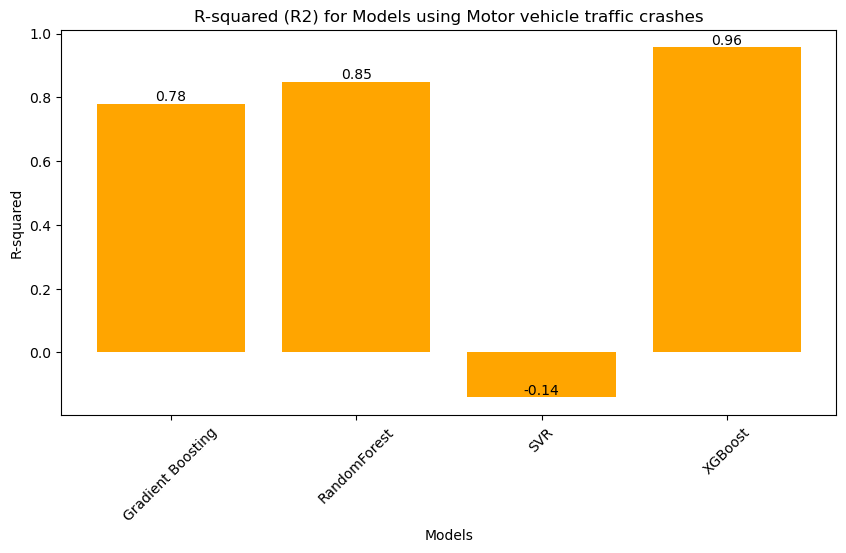

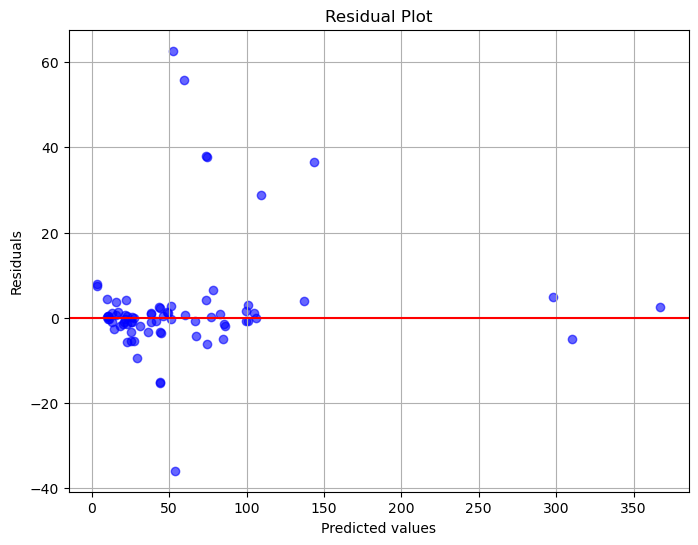

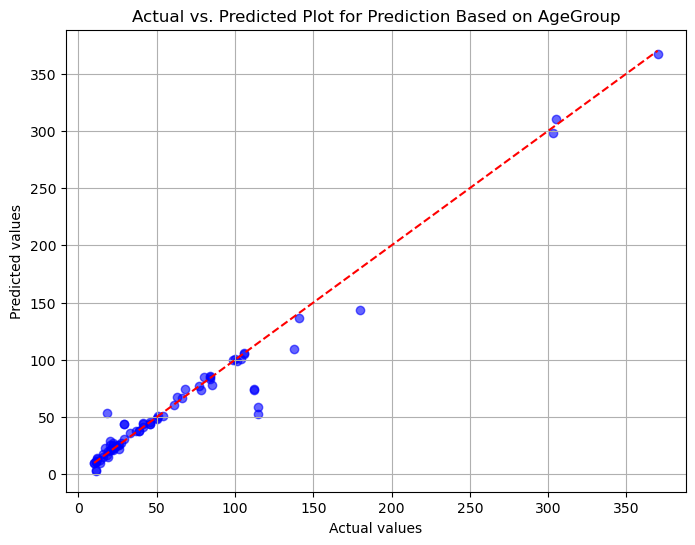

In [34]:
# based on Cause of death
def predict_with_models_CAD(ardi_data, cause_of_death_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Category']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by cause_of_death value
    filtered_data = ardi_data[ardi_data['Cause_of_Death'] == cause_of_death_value]
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Category']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()
    
    return X_test, y_test, y_pred

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, c='blue', marker='o', alpha=0.6)
    plt.title('Residual Plot')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid()
    plt.show()

def actual_vs_predicted_plot(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.6)
    plt.title('Actual vs. Predicted Plot for Prediction Based on Cause of Death')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.grid()
    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the cause_of_death value for filtering
cause_of_death_value = 'Motor vehicle traffic crashes'

# Perform prediction with models for the specified cause_of_death value
X_test, y_test, y_pred = predict_with_models_CAD(ardi_data, cause_of_death_value)

# Plot Residual Plot
residual_plot(y_test, y_pred)

# actual vs predicted
actual_vs_predicted_plot(y_test, y_pred)


## Prediction based on Consumption Pattern

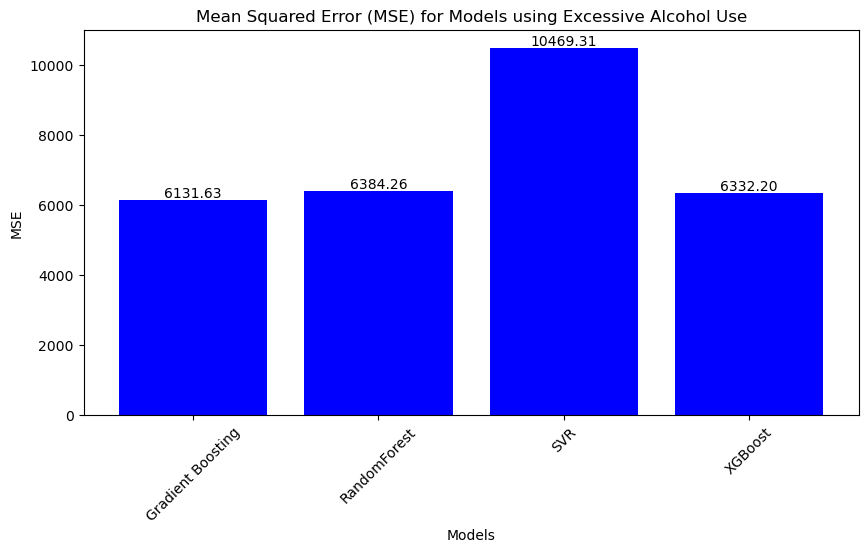

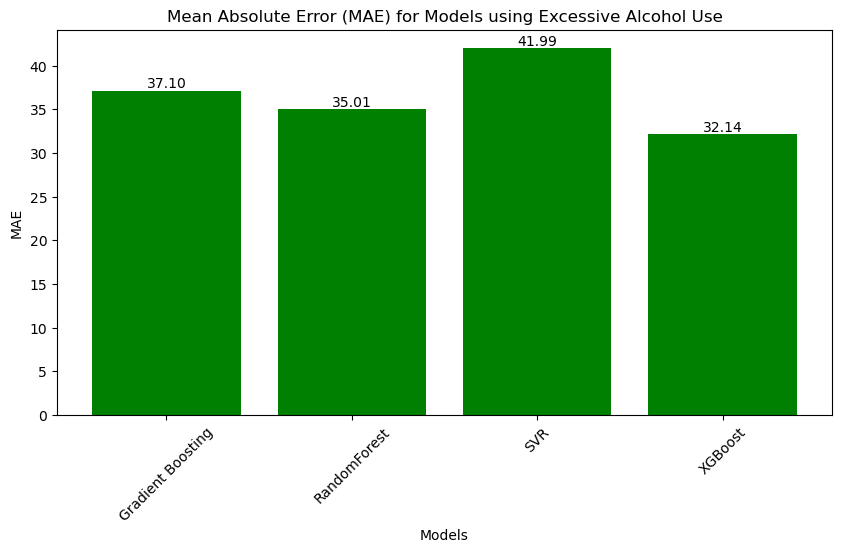

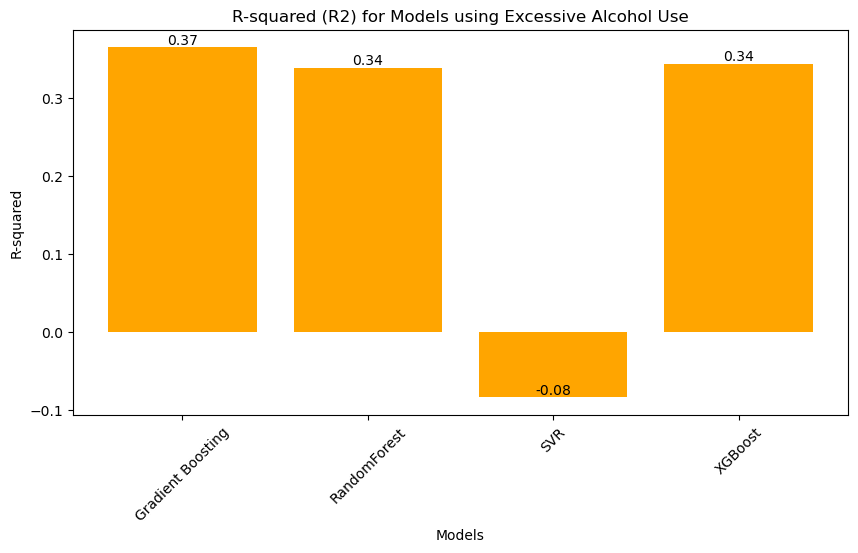

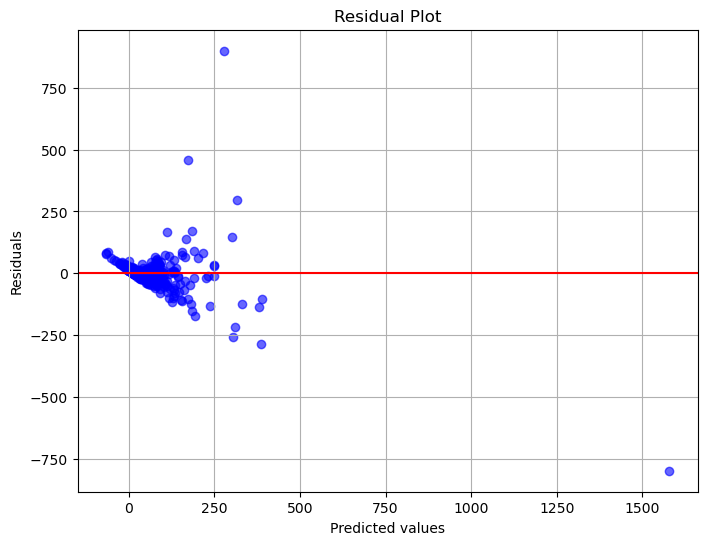

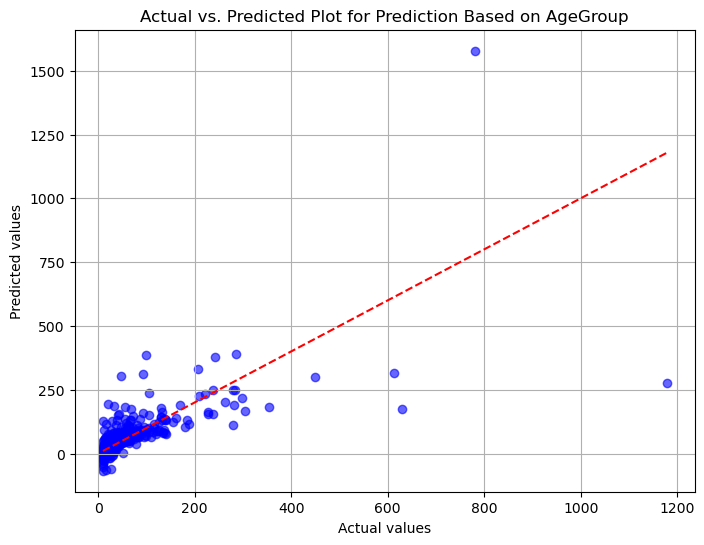

In [35]:
# based on consumption pattern
def predict_with_models_cum(ardi_data, consumption_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConditionType', 'AgeGroup', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by consumption value
    filtered_data = ardi_data[ardi_data['ConsumptionPattern'] == consumption_value]
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConditionType', 'AgeGroup', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {consumption_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {consumption_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {consumption_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()
    
    return X_test, y_test, y_pred

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, c='blue', marker='o', alpha=0.6)
    plt.title('Residual Plot')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid()
    plt.show()

def actual_vs_predicted_plot(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.6)
    plt.title('Actual vs. Predicted Plot for Prediction Based on Consumption Pattern')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.grid()
    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the consumption value for filtering
consumption_value = 'Excessive Alcohol Use'

# Perform prediction with models for the specified consumption value
X_test, y_test, y_pred = predict_with_models_cum(ardi_data, consumption_value)

# Plot Residual Plot
residual_plot(y_test, y_pred)

# actual vs predicted
actual_vs_predicted_plot(y_test, y_pred)


## Prediction based on Category

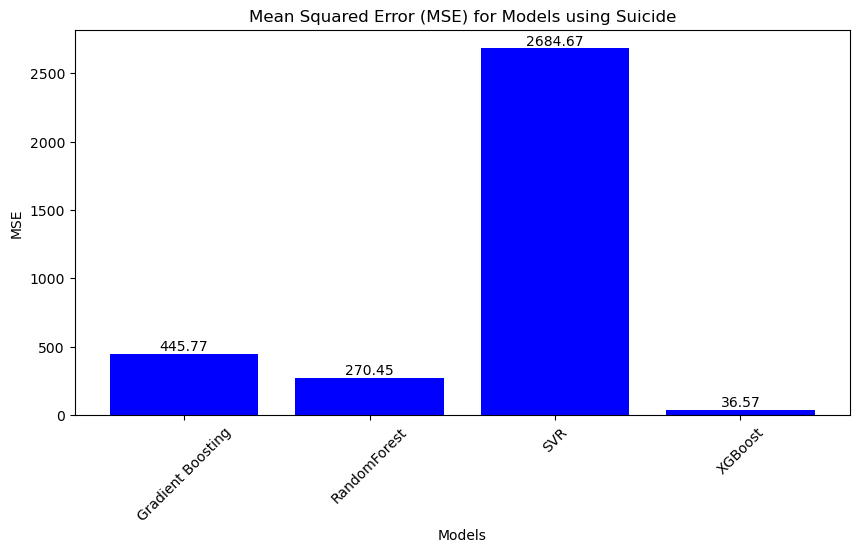

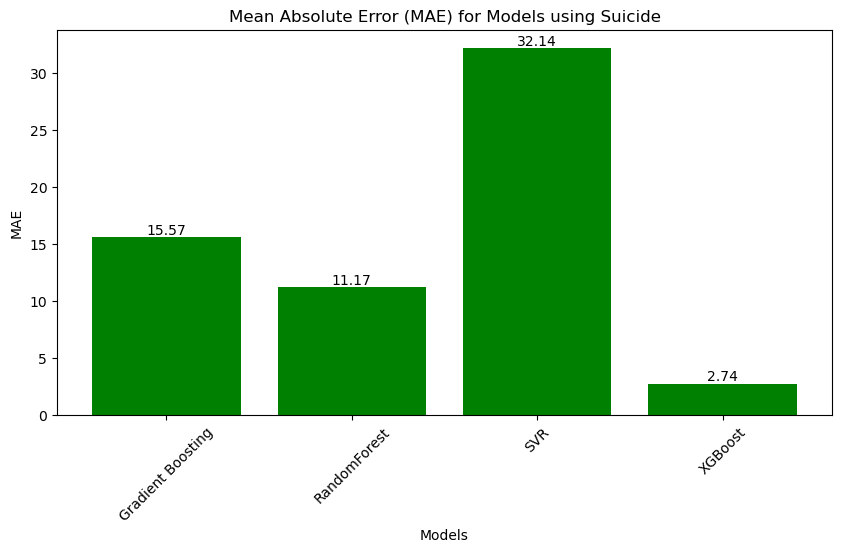

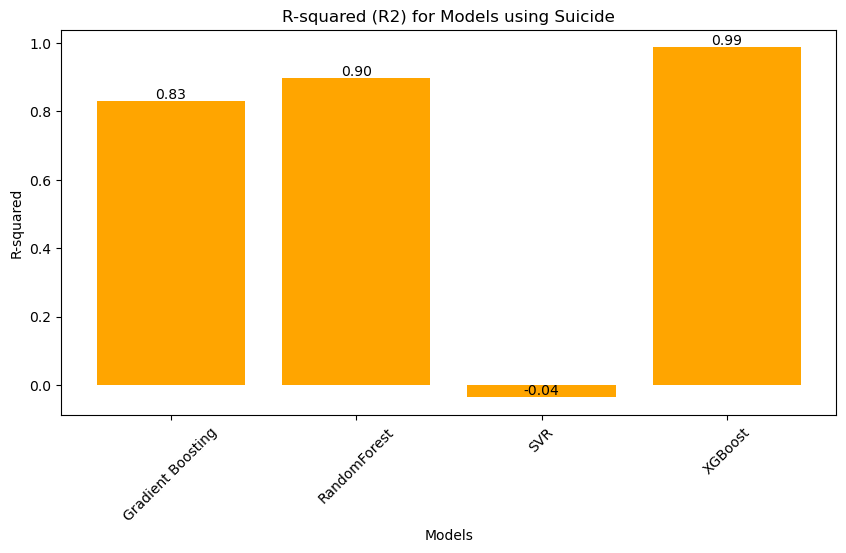

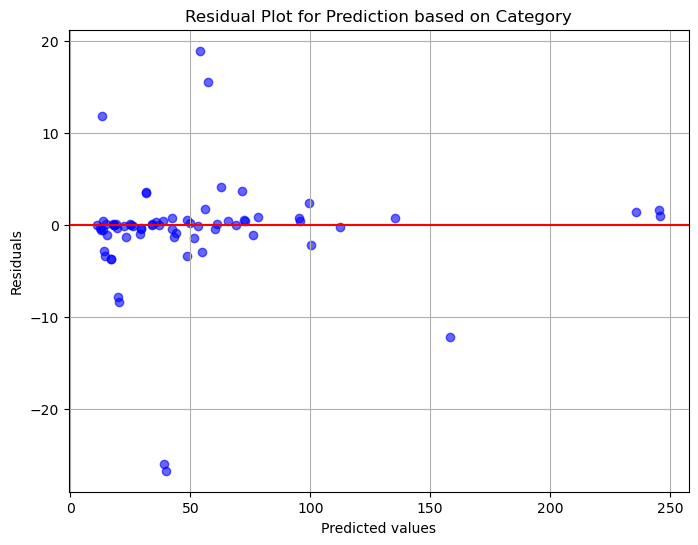

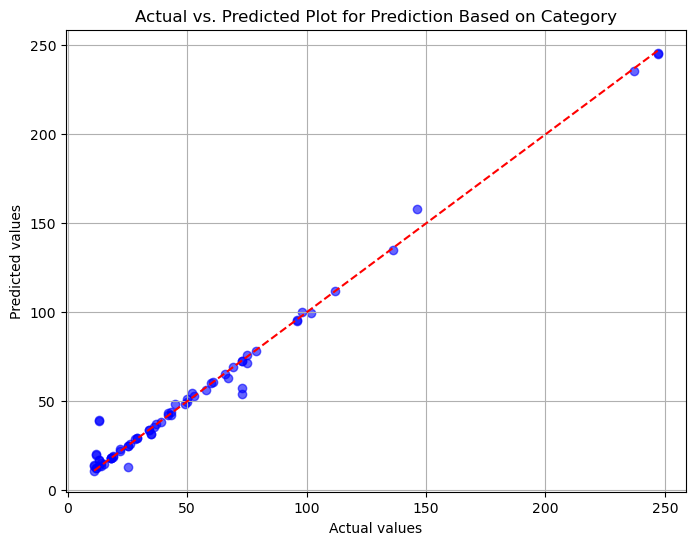

In [36]:
# based on category
def predict_with_models_cat(ardi_data, category_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by category value
    filtered_data = ardi_data[ardi_data['Category'] == category_value]
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()
    
    return X_test, y_test, y_pred

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, c='blue', marker='o', alpha=0.6)
    plt.title('Residual Plot for Prediction based on Category')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid()
    plt.show()
    
def actual_vs_predicted_plot(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.6)
    plt.title('Actual vs. Predicted Plot for Prediction Based on Category')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.grid()
    plt.show()    

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the category value for filtering
category_value = 'Suicide'

# Perform prediction with models for the specified category value
X_test, y_test, y_pred = predict_with_models_cat(ardi_data, category_value)

# Plot Residual Plot
residual_plot(y_test, y_pred)

# actual vs predicted
actual_vs_predicted_plot(y_test, y_pred)


## Prediction based on Age Group

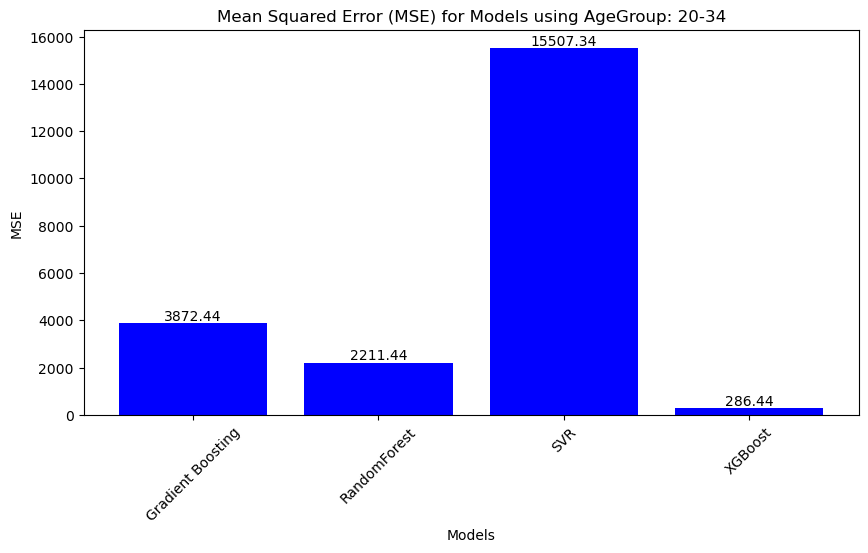

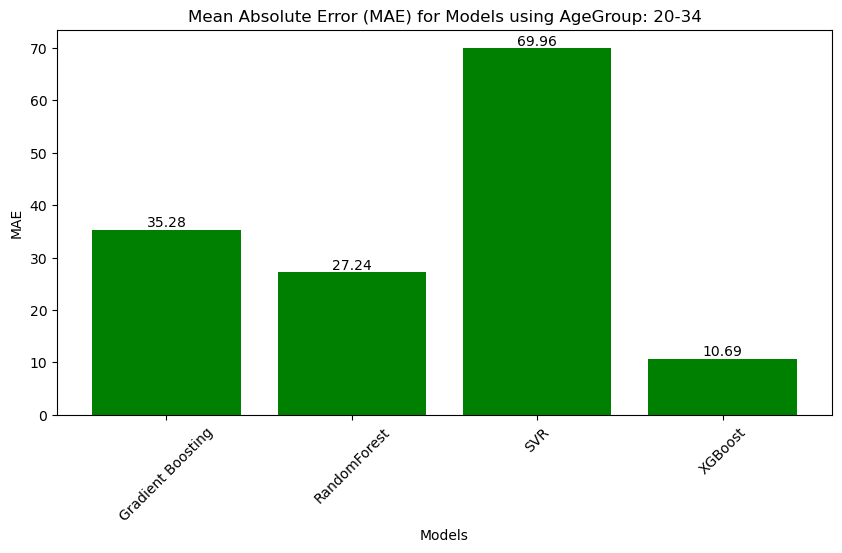

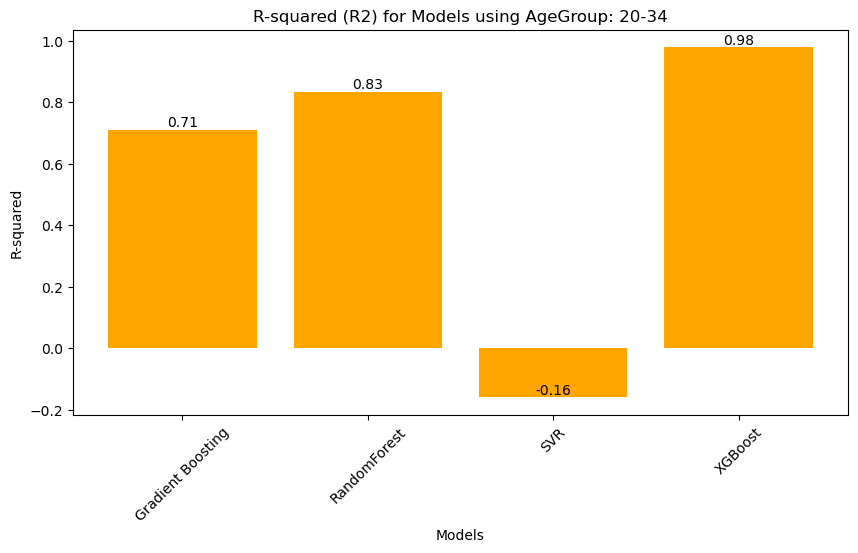

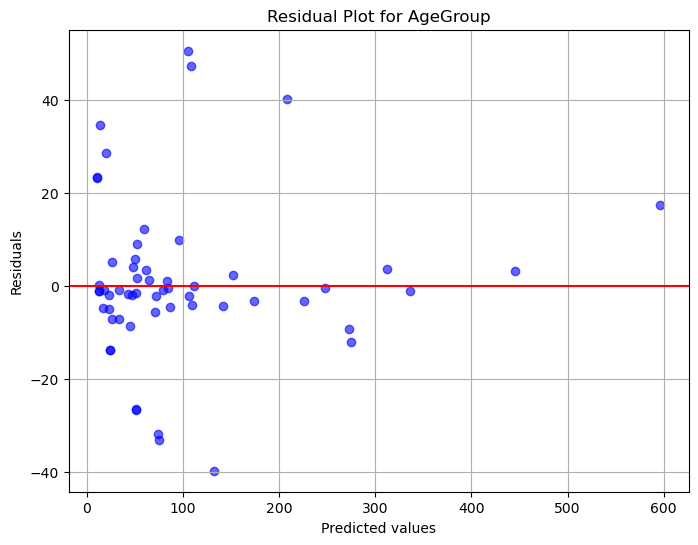

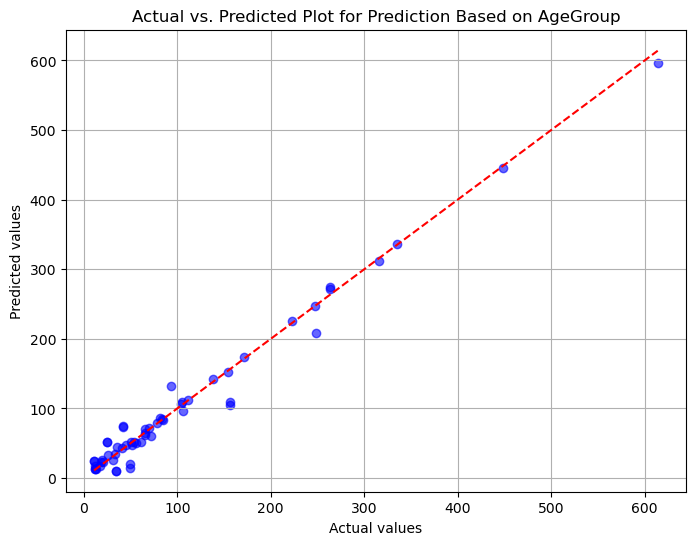

In [37]:
# based on  Agegroup
def predict_with_models_age(ardi_data, age_group):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by age group
    filtered_data = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

    # Return 
    return X_test, y_test, y_pred, mse_results, mae_results, r2_results,models

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    # print( residuals)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, c='blue', marker='o', alpha=0.6)
    plt.title('Residual Plot for AgeGroup')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid()
    plt.show()

def actual_vs_predicted_plot(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.6)
    plt.title('Actual vs. Predicted Plot for Prediction Based on AgeGroup')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.grid()
    plt.show()



# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the age group for filtering
age_group = '20-34'

# Perform prediction with models for the specified age group
X_test, y_test, y_pred, mse_results, mae_results, r2_results, models = predict_with_models_age(ardi_data, age_group)

# Plot Residual Plot
residual_plot(y_test, y_pred)

# Plot Actual vs. Predicted Plot
actual_vs_predicted_plot(y_test, y_pred)



## Using Linear Regression to Generate the  estimate and CI

In [38]:
# using linear regression toget estimate and CI
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [39]:
# for agegroup
def predict_with_models_age(ardi_data, age_group):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by age group
    filtered_data = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Split data into features and target
    features = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    X = filtered_data[features]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Statsmodels for detailed regression analysis
    X2 = sm.add_constant(X_train)  
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    
    results_summary = {
        'coefficients': est2.params,
        'p-values': est2.pvalues,
        'conf_intervals': est2.conf_int(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

     # Create a DataFrame for the results
    conf_intervals = []
    if isinstance(results_summary['conf_intervals'], pd.DataFrame):
        conf_intervals = [tuple(row) for row in results_summary['conf_intervals'].values]
    else:
        conf_intervals = [(results_summary['conf_intervals'][0], results_summary['conf_intervals'][1])]

    results_df = pd.DataFrame({
        'Coefficients': results_summary['coefficients'],
        'P-values': results_summary['p-values'],
        'Confidence Intervals': conf_intervals
    }, index=['const'] + features)

    # Display results for Linear Regression including CI
    print("Linear Regression Results for AgeGroup:",age_group)


    return results_df

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the age group for filtering
age_group = '20-34'

# Perform prediction with the Linear Regression model for the specified age group
results = predict_with_models_age(ardi_data, age_group)

results

Linear Regression Results for AgeGroup: 20-34


Coefficients  P-values  \
const                  40.066941  0.177583   
LocationDesc           -0.560434  0.213502   
ConsumptionPattern     13.913768  0.296455   
ConditionType         -75.596933  0.453566   
Category               -2.464972  0.429865   
Cause_of_Death          2.482385  0.017269   

                                          Confidence Intervals  
const                  (-18.31400754959128, 98.44789030809447)  
LocationDesc        (-1.4457346198969279, 0.32486657351284975)  
ConsumptionPattern    (-12.28783256454115, 40.115367615540755)  
ConditionType         (-274.0304087156164, 122.83654354950112)  
Category              (-8.607455237804658, 3.6775112762759905)  
Cause_of_Death        (0.44317120101039675, 4.521597831356109)

In [40]:
# for category
def predict_with_models_cat(ardi_data, category_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by category
    filtered_data = ardi_data[ardi_data['Category'] == category_value]
    
    # Split data into features and target
    features = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']
    X = filtered_data[features]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Statsmodels for detailed regression analysis
    X2 = sm.add_constant(X_train)  
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    
    results_summary = {
        'Coefficients': est2.params,
        'P-values': est2.pvalues,
        'Confidence Intervals': est2.conf_int(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

    # Create a DataFrame for the results
    conf_intervals = []
    if isinstance(results_summary['Confidence Intervals'], pd.DataFrame):
        conf_intervals = [tuple(row) for row in results_summary['Confidence Intervals'].values]
    else:
        conf_intervals = [(results_summary['Confidence Intervals'][0], results_summary['Confidence Intervals'][1])]

    results_df = pd.DataFrame({
        'Coefficients': results_summary['Coefficients'],
        'P-values': results_summary['P-values'],
        'Confidence Intervals': conf_intervals
    }, index= features)

    # Display results for Linear Regression including CI
    print("Linear Regression Results for Category:", category_value)


    return results_df

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the category for filtering
category_value = 'Suicide'

# Perform prediction with the Linear Regression model for the specified category
results = predict_with_models_cat(ardi_data, category_value)

results

Linear Regression Results for Category: Suicide


Coefficients      P-values  \
LocationDesc       -2.897503e-01  1.833826e-01   
ConsumptionPattern -1.872488e+00  7.639759e-01   
ConditionType       3.902460e-15  7.075111e-01   
AgeGroup            3.433824e+00  1.560937e-01   
Cause_of_Death      1.733932e+00  1.129589e-09   

                                                 Confidence Intervals  
LocationDesc               (-0.7174150178995318, 0.13791435491246273)  
ConsumptionPattern          (-14.136815616867443, 10.391839772468837)  
ConditionType       (-1.6551740824265395e-14, 2.4356660146005805e-14)  
AgeGroup                      (-1.3192021109834817, 8.18685009198494)  
Cause_of_Death                (1.1926695811750423, 2.275194069231076)

In [41]:
# for cause of death
def predict_with_models_CAD(ardi_data, cause_of_death):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['AgeGroup', 'LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by cause of death
    filtered_data = ardi_data[ardi_data['Cause_of_Death'] == cause_of_death]
    
    # Specify features and target
    features = ['AgeGroup', 'LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category']
    X = filtered_data[features]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Statsmodels for detailed regression analysis
    X2 = sm.add_constant(X_train)  
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    
    results_summary = {
        'coefficients': est2.params,
        'p-values': est2.pvalues,
        'conf_intervals': est2.conf_int(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

    # Create DataFrame for the results
    conf_intervals = []
    if isinstance(results_summary['conf_intervals'], pd.DataFrame):
        conf_intervals = [tuple(row) for row in results_summary['conf_intervals'].values]
    else:
        conf_intervals = [(results_summary['conf_intervals'][0], results_summary['conf_intervals'][1])]

    results_df = pd.DataFrame({
        'Coefficients': results_summary['coefficients'],
        'P-values': results_summary['p-values'],
        'Confidence Intervals': conf_intervals
    }, index= features)

    # Display results for Linear Regression including CI
    print("Linear Regression Results for Cause of Death:", cause_of_death)

    return results_df

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the cause of death for analysis
cause_of_death = 'Motor vehicle traffic crashes'

# Perform prediction with the Linear Regression model for the specified cause of death
results = predict_with_models_CAD(ardi_data, cause_of_death)
results


Linear Regression Results for Cause of Death: Motor vehicle traffic crashes


Coefficients      P-values  \
AgeGroup               -6.136758  1.077860e-01   
LocationDesc           -0.081614  8.170523e-01   
ConsumptionPattern      0.645124  9.482211e-01   
ConditionType           0.000000           NaN   
Category               15.752704  4.145992e-08   

                                         Confidence Intervals  
AgeGroup             (-13.623556000014641, 1.350039684992156)  
LocationDesc         (-0.775264772636659, 0.6120365274856856)  
ConsumptionPattern  (-18.887700363500006, 20.177947670836016)  
ConditionType                                      (0.0, 0.0)  
Category               (10.24632693069528, 21.25908063071497)

In [42]:
# foe location
def predict_with_models_location(ardi_data, location):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by location
    filtered_data = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Specify features and target
    features = ['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    X = filtered_data[features]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Statsmodels for detailed regression analysis
    X2 = sm.add_constant(X_train)  
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    
    results_summary = {
        'coefficients': est2.params,
        'p-values': est2.pvalues,
        'conf_intervals': est2.conf_int(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

     # Create a DataFrame for the results
    conf_intervals = []
    if isinstance(results_summary['conf_intervals'], pd.DataFrame):
        conf_intervals = [tuple(row) for row in results_summary['conf_intervals'].values]
    else:
        conf_intervals = [(results_summary['conf_intervals'][0], results_summary['conf_intervals'][1])]

    results_df = pd.DataFrame({
        'Coefficients': results_summary['coefficients'],
        'P-values': results_summary['p-values'],
        'Confidence Intervals': conf_intervals
    }, index=['const'] + features)

    # Display results for Linear Regression including CI
    print("Linear Regression Results for Location:",location)


    return results_df

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the location for filtering
location = 'New York'

# Perform prediction with the Linear Regression model for the specified location
results = predict_with_models_location(ardi_data, location)

results

Linear Regression Results for Location: New York


Coefficients  P-values  \
const                  65.708383  0.118581   
AgeGroup                4.612018  0.647843   
ConsumptionPattern      7.447864  0.714628   
ConditionType           4.077663  0.878782   
Category              -20.272040  0.001988   
Cause_of_Death          3.642365  0.007697   

                                         Confidence Intervals  
const                (-17.077992938503215, 148.4947588140098)  
AgeGroup              (-15.3465134467095, 24.570549188450812)  
ConsumptionPattern   (-32.82101659763574, 47.716744505741865)  
ConditionType        (-48.79307880751148, 56.948405374007606)  
Category            (-32.950460837581765, -7.593620158156137)  
Cause_of_Death        (0.9840860097906945, 6.300643203089479)

In [43]:
# for consumption pattern
def predict_with_models_consum(ardi_data, consumption_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConditionType', 'AgeGroup', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by consumption pattern
    filtered_data = ardi_data[ardi_data['ConsumptionPattern'] == consumption_value]
    
    # Specify features and target
    features = ['LocationDesc', 'ConditionType', 'AgeGroup', 'Category', 'Cause_of_Death']
    X = filtered_data[features]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Statsmodels for detailed regression analysis
    X2 = sm.add_constant(X_train)  
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    
    results_summary = {
        'coefficients': est2.params,
        'p-values': est2.pvalues,
        'conf_intervals': est2.conf_int(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

    # Create a DataFrame for the results
    conf_intervals = []
    if isinstance(results_summary['conf_intervals'], pd.DataFrame):
        conf_intervals = [tuple(row) for row in results_summary['conf_intervals'].values]
    else:
        conf_intervals = [(results_summary['conf_intervals'][0], results_summary['conf_intervals'][1])]

    results_df = pd.DataFrame({
        'Coefficients': results_summary['coefficients'],
        'P-values': results_summary['p-values'],
        'Confidence Intervals': conf_intervals
    }, index=['const'] + features)

    # Display results for Linear Regression including CI
    print("Linear Regression Results for consumption pattern:", consumption_value)


    return results_df
# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the consumption pattern for filtering
consumption_value = 'Excessive Alcohol Use'

# Perform prediction with the Linear Regression model for the specified consumption pattern
results = predict_with_models_consum(ardi_data, consumption_value)

results

Linear Regression Results for consumption pattern: Excessive Alcohol Use


Coefficients      P-values  \
const              55.763007  1.465274e-07   
LocationDesc       -0.247126  1.394913e-01   
ConditionType       6.619677  3.279494e-01   
AgeGroup           -1.170718  6.381908e-01   
Category           -8.366111  4.534278e-08   
Cause_of_Death      1.955897  1.390917e-09   

                                      Confidence Intervals  
const               (35.05028836657392, 76.47572583017418)  
LocationDesc    (-0.5749924279226812, 0.08074062057760406)  
ConditionType     (-6.649107696928793, 19.888461282340977)  
AgeGroup          (-6.053167080190251, 3.7117312903095723)  
Category        (-11.352210842633513, -5.3800107369902985)  
Cause_of_Death     (1.3262171385374208, 2.585576509524774)

## testing proposed classification analysis using Random forest

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv("Cleaned_1_data.csv")  

In [45]:
# For Category
# target variable
target_variable = "Category"  

# Select features and target variable
features = ["LocationDesc", "Effect", "ConsumptionPattern", "AgeGroup"]
X = data[features]
y = data[target_variable]

# Handle categorical variables by encoding them
label_encoders = {}
for feature in features:
    if X[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        # With this line:
        X.loc[:, feature] = label_encoders[feature].fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import numpy as np

# Get unique class names
unique_classes = np.unique(y_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity
num_classes = conf_matrix.shape[0]  
if num_classes > 2:  
    for i in range(num_classes):
        class_name = unique_classes[i]
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fp - fn
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        print(f"Class {class_name}: Sensitivity: {sensitivity}, Specificity: {specificity}")
else:
    print("This code is for multiclass classification. Please modify it for binary classification.")


Accuracy: 0.14164648910411623
Class 100% Alcohol-Attributable: Sensitivity: 0.19879518072289157, Specificity: 0.7212121212121212
Class Alcohol-Related Poisonings: Sensitivity: 0.0, Specificity: 0.9245541838134431
Class Cancer: Sensitivity: 0.43661971830985913, Specificity: 0.6228070175438597
Class Heart Disease and Stroke: Sensitivity: 0.13114754098360656, Specificity: 0.8948863636363636
Class Liver, Gallbladder, and Pancreas: Sensitivity: 0.0, Specificity: 0.9948979591836735
Class Motor Vehicle Traffic Crashes: Sensitivity: 0.046511627906976744, Specificity: 0.9567567567567568
Class Other Acute Causes: Sensitivity: 0.019417475728155338, Specificity: 0.8948824343015215
Class Other Chronic Causes: Sensitivity: 0.0, Specificity: 1.0
Class Suicide: Sensitivity: 0.0, Specificity: 0.9657894736842105


In [46]:
# For Cause of Death
# target variable
target_variable = "Cause_of_Death"  

# Select features and target variable
features = ["LocationDesc", "Effect", "ConsumptionPattern", "AgeGroup"]
X = data[features]
y = data[target_variable]

# Handle categorical variables by encoding them
label_encoders = {}
for feature in features:
    if X[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        X.loc[:, feature] = label_encoders[feature].fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier 
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get unique class names
unique_classes = np.unique(y_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity
num_classes = conf_matrix.shape[0] 
if num_classes > 2:  
    for i, class_name in enumerate(unique_classes):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fp - fn
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        print(f"Class {class_name}: Sensitivity: {sensitivity}, Specificity: {specificity}")

else:
    print("This code is for multiclass classification. Please modify it for binary classification.")


Accuracy: 0.007263922518159807
Class Alcohol abuse: Sensitivity: 0.0, Specificity: 0.961439588688946
Class Alcohol cardiomyopathy: Sensitivity: 0.0, Specificity: 1.0
Class Alcohol dependence syndrome: Sensitivity: 0.0, Specificity: 0.9170918367346939
Class Alcohol poisoning: Sensitivity: 0.0, Specificity: 0.9528662420382166
Class Alcoholic liver disease: Sensitivity: 0.016666666666666666, Specificity: 0.9490861618798956
Class Alcoholic psychosis: Sensitivity: 0.0, Specificity: 0.9828220858895705
Class Aspiration: Sensitivity: 0.0, Specificity: 1.0
Class Atrial fibrillation: Sensitivity: 0.0, Specificity: 0.9791154791154791
Class Cancer, breast (females only): Sensitivity: 0.0, Specificity: 0.9875776397515528
Class Cancer, colorectal: Sensitivity: 0.0, Specificity: 0.9712140175219024
Class Cancer, esophageal: Sensitivity: 0.0, Specificity: 0.9776951672862454
Class Cancer, laryngeal: Sensitivity: 0.0, Specificity: 0.9914529914529915
Class Cancer, liver: Sensitivity: 0.0, Specificity: 0.9